# Install Finesse

In [1]:
%%capture
!pip install finesse

# Import Finesse

In [2]:
import finesse
finesse.configure(plotting=True)
from finesse.analysis.actions import Xaxis

# Two mirror Fabry-Perot cavity

Cavities are a fundamental building block of current gravitational wave detectors and an important instrument in laser optics.

<img src="https://finesse.ifosim.org/docs/develop/_images/fabry_perot_example1.svg" width="600"/>

In [3]:
cavity = finesse.Model()
cavity.parse(
    """
    # Add a Laser named l1 with a power of 1 W.
    l l1 P=1

    # Space attaching l1 <-> m1 with length of 1 m
    s s0 l1.p1 m1.p1 L=1

    # Input mirror of cavity.
    m m1 R=0.99 T=0.01

    # Intra-cavity space with length of 1 m.
    s cav m1.p2 m2.p1 L=1

    # End mirror of cavity.
    m m2 R=0.991 T=0.009

    # Power detectors on reflection, circulation and transmission.
    pd refl m1.p1.o
    pd circ m2.p1.i
    pd trans m2.p2.o

    """
)

# <font color='brown'> Question: What would happen if we change the length of the cavity by moving one of the mirrors? <font>

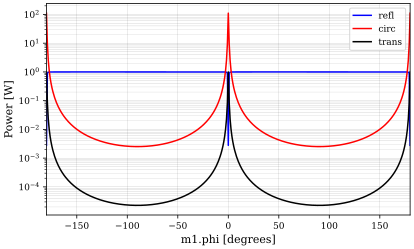

In [4]:
# We expect cavity resonance when cavity length is integer number of half wavelengths
out = cavity.run(Xaxis('m1.phi', 'lin', -180, 180, 400))
out.plot(logy=True);

# <font color='blue'> TASK: Change the frequency of the laser and plot the output <font>

**Mirror positions and tunings**

One of the most crucial aspects in optical interferometery is accurately positioning mirrors. The optical wavelengths we use in current gravitational wave detectors is  𝜆=1064𝑛𝑚 . Typically we are interested in either macroscopic positioning, such as a mirror is 1m, 1cm, 1mm, etc. away, or in microscopic positions which are fractions of  𝜆 . The resonance condition of a Fabry-Perot cavity requires its length to be an integer number of half-wavelengths and for modelling its behaviour length differences  ≪𝜆=1064  nm are of interest. Some orders of magnitude:

*   LIGO peak senitivity in meters:  $\sim 10^{−20}$  m
*   LIGO cavity mirror postion control accuracy:  $< 10^{−12}$  m
*   LIGO arm cavity length:  $\sim 10^3$  m
*   Relative numerical accuracy of floating point numbers:  $10^{−15}$

As we can see there are many orders of magnitude difference between the lengths of cavities and the types of signal we might measure. With such a large dynamic range typical floating point variables used in computers cannot represent this. Thus we break lengths up into macroscopic and microscopic lengths. The length given by the space component are macroscopic and are always rounded to the nearest integer number of  𝜆 .

We change the microscopic length differences in Finesse by changing the mirrors tuning value. Tuning is usually refered to in units of degrees, 360 degrees  =𝜆 . So a tuning of 180 degrees means we have moved the mirror by half a wavelength. You can read more about this in the [Living Review article](https://link.springer.com/article/10.1007/s41114-016-0002-8), section 2.5, "Lengths and tunings: numerical accuracy of distances".